<a href="https://colab.research.google.com/github/jrleonett/FFT-Espectrograma/blob/main/Audio_FFT_Espectrograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Audio con FFT y Espectrograma**

Este programa permite analizar un archivo de audio (.mp3 o .wav) mediante la Transformada Rápida de Fourier (FFT) y la generación de un espectrograma. Desarrollado por José R. leonett.

## **Descripción del programa:**
1. **Instalación de bibliotecas y creación de la carpeta**:
   - Se instalan las bibliotecas necesarias (`librosa`, `matplotlib`, `numpy`, `scipy`).
   - Se crea automáticamente la carpeta `transcribir`, donde debes colocar tu archivo de audio.

2. **Procesamiento del archivo de audio**:
   - Se carga el archivo de audio desde la carpeta `transcribir`.
   - Se realiza la Transformada Rápida de Fourier (FFT) para analizar las frecuencias del audio.
   - Se genera un espectrograma para visualizar la distribución de frecuencias a lo largo del tiempo.

## **Instrucciones de uso:**
1. Ejecuta la **Parte 1** para instalar las bibliotecas y crear la carpeta.
2. Sube tu archivo de audio (`.mp3` o `.wav`) a la carpeta `transcribir`.
3. Ejecuta la **Parte 2** para procesar el archivo y generar las gráficas.

---

In [11]:
#@title [01] Configuración del entorno
%%capture
import os

# Creación de la carpeta "transcribir"
carpeta = "EVIDENCIAS"
if not os.path.exists(carpeta):
    os.mkdir(carpeta)
    print(f"Carpeta '{carpeta}' creada. Por favor, coloca tu archivo de audio (.mp3 o .wav) en esta carpeta.")
else:
    print(f"La carpeta '{carpeta}' ya existe. Asegúrate de colocar tu archivo de audio (.mp3 o .wav) en esta carpeta.")

# Instalación de las bibliotecas necesarias
!pip install librosa matplotlib numpy scipy pydub ffprobe

# Verificación de la GPU asignada (opcional)
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Procesando archivo: EVIDENCIAS/Homografia.wav

Información técnica del archivo:
[STREAM]
index=0
codec_name=pcm_s16le
codec_long_name=PCM signed 16-bit little-endian
profile=unknown
codec_type=audio
codec_tag_string=[1][0][0][0]
codec_tag=0x0001
sample_fmt=s16
sample_rate=24000
channels=1
channel_layout=unknown
bits_per_sample=16
id=N/A
r_frame_rate=0/0
avg_frame_rate=0/0
time_base=1/24000
start_pts=N/A
start_time=N/A
duration_ts=14792640
duration=616.360000
bit_rate=384000
max_bit_rate=N/A
bits_per_raw_sample=N/A
nb_frames=N/A
nb_read_frames=N/A
nb_read_packets=N/A
DISPOSITION:default=0
DISPOSITION:dub=0
DISPOSITION:original=0
DISPOSITION:comment=0
DISPOSITION:lyrics=0
DISPOSITION:karaoke=0
DISPOSITION:forced=0
DISPOSITION:hearing_impaired=0
DISPOSITION:visual_impaired=0
DISPOSITION:clean_effects=0
DISPOSITION:attached_pic=0
DISPOSITION:timed_thumbnails=0
[/STREAM]
[FORMAT]
filename=EVIDENCIAS/Homografia.wav
nb_streams=1
nb_programs=0
format_name=wav
format_long_name=WAV / WAVE (Wavef

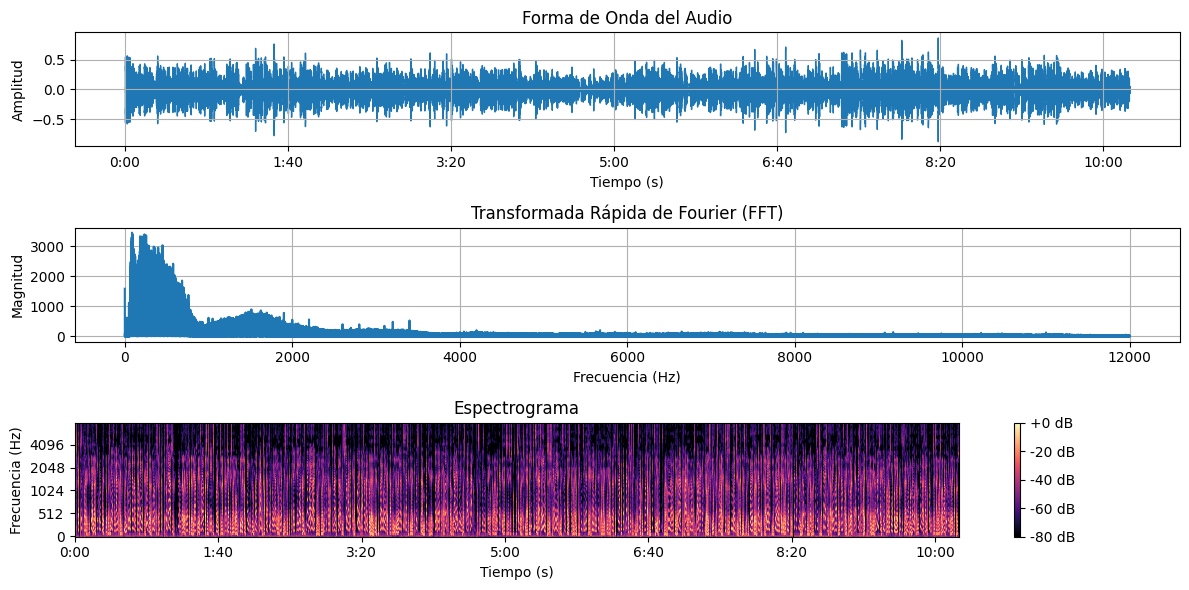


Desarrollado por José R. Leonett


In [12]:
#@title [02] Procesamiento del archivo de audio
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub import AudioSegment
import subprocess

def obtener_info_audio(archivo_audio):
    """
    Obtiene información técnica del archivo de audio usando ffprobe.
    """
    try:
        resultado = subprocess.run(
            ["ffprobe", "-v", "error", "-show_format", "-show_streams", archivo_audio],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        if resultado.returncode != 0:
            print("Error al obtener información del archivo de audio.")
            return None
        return resultado.stdout
    except Exception as e:
        print(f"Error: {e}")
        return None

def analizar_transcodificacion(info_audio):
    """
    Analiza si el archivo está transcodificado comparando el codec con el formato.
    """
    if not info_audio:
        return "No se pudo obtener información del archivo."

    codec = None
    formato = None
    for linea in info_audio.split("\n"):
        if linea.startswith("codec_name="):
            codec = linea.split("=")[1]
        if linea.startswith("format_name="):
            formato = linea.split("=")[1]

    if codec and formato:
        if codec.lower() == formato.lower():
            return f"El archivo NO está transcodificado. El codec '{codec}' coincide con el formato '{formato}'."
        else:
            return f"El archivo ESTÁ transcodificado. El codec '{codec}' NO coincide con el formato '{formato}'."
    else:
        return "No se pudo determinar si el archivo está transcodificado."

def procesar_audio(archivo_audio):
    # Cargar el archivo de audio
    y, sr = librosa.load(archivo_audio, sr=None)  # sr=None mantiene la frecuencia de muestreo original

    # Obtener información técnica del archivo
    info_audio = obtener_info_audio(archivo_audio)
    print("\nInformación técnica del archivo:")
    print(info_audio)

    # Analizar si el archivo está transcodificado
    resultado_transcodificacion = analizar_transcodificacion(info_audio)
    print("\nAnálisis de transcodificación:")
    print(resultado_transcodificacion)
    print("")

    # Gráfica de la forma de onda
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Forma de Onda del Audio')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()

    # Transformada Rápida de Fourier (FFT)
    fft = np.fft.fft(y)  # Calcula la FFT
    magnitudes = np.abs(fft)  # Obtiene las magnitudes de la FFT
    fases = np.angle(fft)  # Obtiene las fases de la FFT

    # Crear un array de frecuencias correspondiente a la FFT
    frecuencias = np.fft.fftfreq(len(y), d=1/sr)

    # Gráfica de la Transformada Rápida de Fourier (FFT)
    plt.subplot(3, 1, 2)
    plt.plot(frecuencias[:len(frecuencias)//2], magnitudes[:len(magnitudes)//2])
    plt.title('Transformada Rápida de Fourier (FFT)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid()

    # Representación del espectrograma
    plt.subplot(3, 1, 3)
    espectrograma = librosa.feature.melspectrogram(y=y, sr=sr)  # Calcula el espectrograma
    espectrograma_db = librosa.power_to_db(espectrograma, ref=np.max)  # Convierte a dB
    librosa.display.specshow(espectrograma_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.tight_layout()
    plt.show()

    # Mensaje de crédito
    print("\nDesarrollado por José R. Leonett")

# Verificar si la carpeta "transcribir" existe y buscar el archivo de audio
carpeta = "EVIDENCIAS"
if os.path.exists(carpeta):
    archivos = os.listdir(carpeta)
    archivos_audio = [archivo for archivo in archivos if archivo.endswith((".mp3", ".wav", ".flac", ".ogg", ".m4a", ".mp4"))]

    if len(archivos_audio) == 0:
        print("No se encontraron archivos de audio en la carpeta 'EVIDENCIAS'. Por favor, coloca un archivo de audio (.mp3 o .wav) en esta carpeta.")
    else:
        # Tomar el primer archivo de audio encontrado
        archivo_audio = os.path.join(carpeta, archivos_audio[0])
        print(f"Procesando archivo: {archivo_audio}")
        procesar_audio(archivo_audio)
else:
    print("La carpeta 'EVIDENCIAS' no existe. Por favor, ejecuta la primera parte del código para crearla.")